In [166]:
!pip install --upgrade scikit-learn

In [167]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas.util.testing as tm
from datetime import datetime
import matplotlib.pyplot as plt

from numpy.linalg import matrix_rank

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

#librerias para modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import statsmodels.api as srm

#para graficar el arbol de decision
from sklearn.tree import export_graphviz 
from IPython.display import Image 

#librerias para la validacion y obtener metricas
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,roc_curve, auc,r2_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

#guardar modelos entrenados
from joblib import dump, load
import os

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics._plot.confusion_matrix' (C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py)

In [2]:
# PUNTO 1
# Leer el database en formato csv
df = pd.read_csv("dataset_SCL.csv")

C:\Users\Francisco\AppData\Local\Temp\ipykernel_2648\3113715336.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_SCL.csv")


In [3]:
#df

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


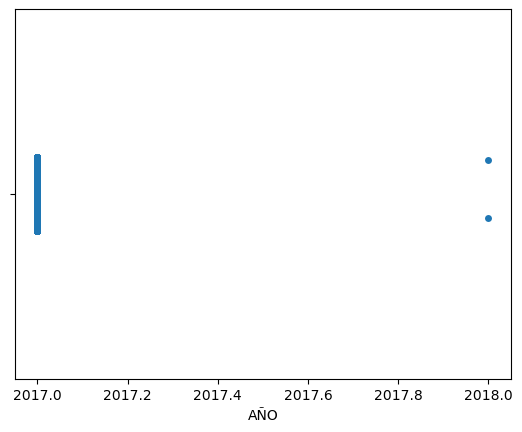

In [5]:
# Anteriormente, se aprecia que el valor máximo del año es 2018 por lo que se visualiza de mejor manera con un gráfico.
sn.stripplot(x='AÑO', data=df) 
plt.show()

In [6]:
#Como el analisis de los vuelos son solo del 2017, los 2 valores del 2018 deben ser eliminados.
#Se transforman a Null
df.loc[df['AÑO'] == 2018, ['AÑO']] = np.nan

In [7]:
#Se revisan la cantidad de datos Nulos
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          2
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [8]:
# Como son pocos datos nulos (menor al 5%), se eliminan.
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [10]:
# Todos los vuelos tienen el mismo origen por lo que esta información es irrelevante.
df["Ori-I"].describe()

count     68203
unique        1
top        SCEL
freq      68203
Name: Ori-I, dtype: object

In [11]:
# Todos los vuelos tienen el mismo origen por lo que esta información es irrelevante. 
# Basta con comentar que el origen siempre es el mismo
df["Ori-O"].describe()

count     68203
unique        1
top        SCEL
freq      68203
Name: Ori-O, dtype: object

In [12]:
del df["Ori-I"]
del df["Ori-O"]

In [13]:
df2 = df

In [14]:
#df = pd.get_dummies(df, drop_first= True)

In [15]:
#df.info()

In [16]:
df2 = pd.get_dummies(df2, columns = ["Des-I"], drop_first=True)
df2 = pd.get_dummies(df2, columns = ["Emp-I"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["Des-O"], drop_first=True) 
df2 = pd.get_dummies(df2, columns = ["Emp-O"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["DIANOM"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["TIPOVUELO"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["OPERA"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["SIGLAORI"], drop_first = True)
df2 = pd.get_dummies(df2, columns = ["SIGLADES"], drop_first = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68203 entries, 0 to 68205
Columns: 282 entries, Fecha-I to SIGLADES_Washington
dtypes: float64(1), int64(2), object(4), uint8(275)
memory usage: 22.0+ MB


In [17]:
#df2

In [87]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [19]:
df2.std()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_2648\3979150737.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.std()


DIA                               8.782708
MES                               3.523201
AÑO                               0.000000
Des-I_EGLL                        0.054743
Des-I_EGYP                        0.003829
Des-I_KATL                        0.072260
Des-I_KDFW                        0.072160
Des-I_KIAH                        0.069912
Des-I_KJFK                        0.074727
Des-I_KLAX                        0.047465
Des-I_KMCO                        0.022322
Des-I_KMIA                        0.121082
Des-I_LEMD                        0.113738
Des-I_LFPG                        0.072361
Des-I_LIRF                        0.061507
Des-I_MDPC                        0.028127
Des-I_MMMX                        0.100717
Des-I_MMUN                        0.030379
Des-I_MPTO                        0.162449
Des-I_NZAA                        0.072561
Des-I_SAAR                        0.044611
Des-I_SABE                        0.208104
Des-I_SACO                        0.121551
Des-I_SAEZ 

C:\Users\Francisco\AppData\Local\Temp\ipykernel_2648\3878876083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr().abs()


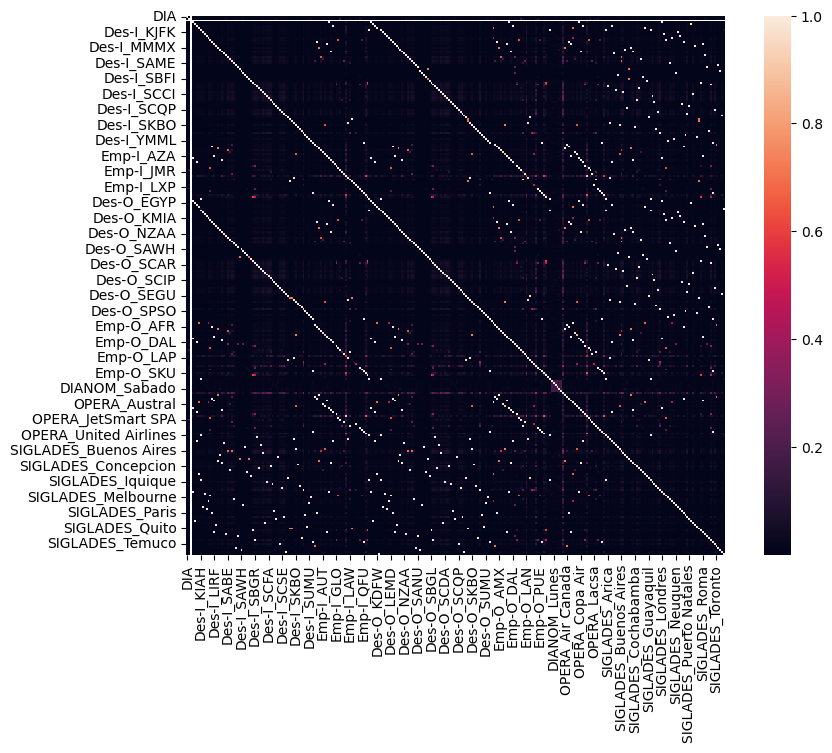

In [20]:
# Se revisa la relevancia de las variables
corrmat = df2.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True);

In [21]:
#PUNTO 2
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['high_season'] = ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | \
                    ((df['Fecha-I'].dt.month == 1) | (df['Fecha-I'].dt.month == 2) | \
                    ((df['Fecha-I'].dt.month == 3) & (df['Fecha-I'].dt.day <= 3))) | \
                    ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | \
                    ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))

In [23]:
df["high_season"]

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        

In [24]:
df["high_season"].describe()

count     68203
unique        2
top       False
freq      45444
Name: high_season, dtype: object

In [25]:
df['min_diff'] = (pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S') - df['Fecha-I']).dt.total_seconds() // 60

In [26]:
df["min_diff"].describe()

count    68203.000000
mean         9.110640
std         19.313597
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: min_diff, dtype: float64

In [27]:
# En promedio los vuelos suelen atrasarse 9 minutos aproximadamente.

In [28]:
df['delay_15'] = np.where(df['min_diff'] > 15, 1, 0)

In [29]:
df["delay_15"].describe()

count    68203.000000
mean         0.184933
std          0.388246
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: delay_15, dtype: float64

In [30]:
# Al ser la media de 0.184933 es posible apreciar de que la mayoria de los vuelos no se atrasan más de 15 minutos.
# Aproximadamente solo un 18% se atrasan más de 15 minutos.

In [31]:
# Definir una funcion para obtener que horas corresponden a los periodos requeridos.
def periodos(hora):
    if hora >= 5 and hora <= 11:
        return 'morning'
    elif hora >= 12 and hora <= 18:
        return 'afternoon'
    else:
        return 'night'

In [32]:
# Crear la columna con ayuda de la función definida anteriormente.
df['period_day'] = df['Fecha-I'].dt.hour.map(periodos)

In [33]:
# Punto 3

In [34]:
"""Para obtener los ratios de atraso se utiliza delay_15 y no min_diff ya que la primera es una variable binaria la cual indica si un vuelo se atrasa o no. En cambio, la segunda no. Por lo tanto, para esta ocasión lo importante es poder ver la probabilidad de atraso y no cuanto se atrasan en promedio."""

'Para obtener los ratios de atraso se utiliza delay_15 y no min_diff ya que la primera es una variable binaria la cual indica si un vuelo se atrasa o no. En cambio, la segunda no. Por lo tanto, para esta ocasión lo importante es poder ver la probabilidad de atraso y no cuanto se atrasan en promedio.'

In [35]:
# Computar el ratio de atraso del destino.
destination_delay_rate = df.groupby('Des-O')['delay_15'].mean().sort_values(ascending=False)

In [36]:
# Computar el ratio de atraso de la aerolinea.
airline_delay_rate = df.groupby('Emp-O')['delay_15'].mean().sort_values(ascending=False)

In [37]:
# Computar el ratio de atraso dependiendo del mes.
month_delay_rate = df.groupby('MES')['delay_15'].mean()

In [38]:
# Computar el ratio de atraso dependiendo del día de la semana.
day_of_week_delay_rate = df.groupby('DIANOM')['delay_15'].mean().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

In [39]:
# Función que entrega si un vuelo fue hecho en temporada alta o baja pero con string en vez de True o False.
def get_season(fecha):
    fecha1 = datetime(2017,12,15)
    fecha2 = datetime(2017,3,3)
    fecha3 = datetime(2017,7,15)
    fecha4 = datetime(2017,7,31)
    fecha5 = datetime(2017,9,11)
    fecha6 = datetime(2017,9,30)
    if fecha1 <= fecha <= fecha2 or fecha3 <= fecha <= fecha4 or fecha5 <= fecha <= fecha6:
        return 'high season'
    else:
        return 'low season'

In [40]:
df['season'] = df['Fecha-I'].map(get_season)
season_delay_rate = df.groupby('season')['delay_15'].mean()

In [41]:
df['season'].describe()

count          68203
unique             2
top       low season
freq           61517
Name: season, dtype: object

In [42]:
# Computar el ratio de atraso acorde al tipo de vuelo
type_of_flight_delay_rate = df.groupby('TIPOVUELO')['delay_15'].mean()

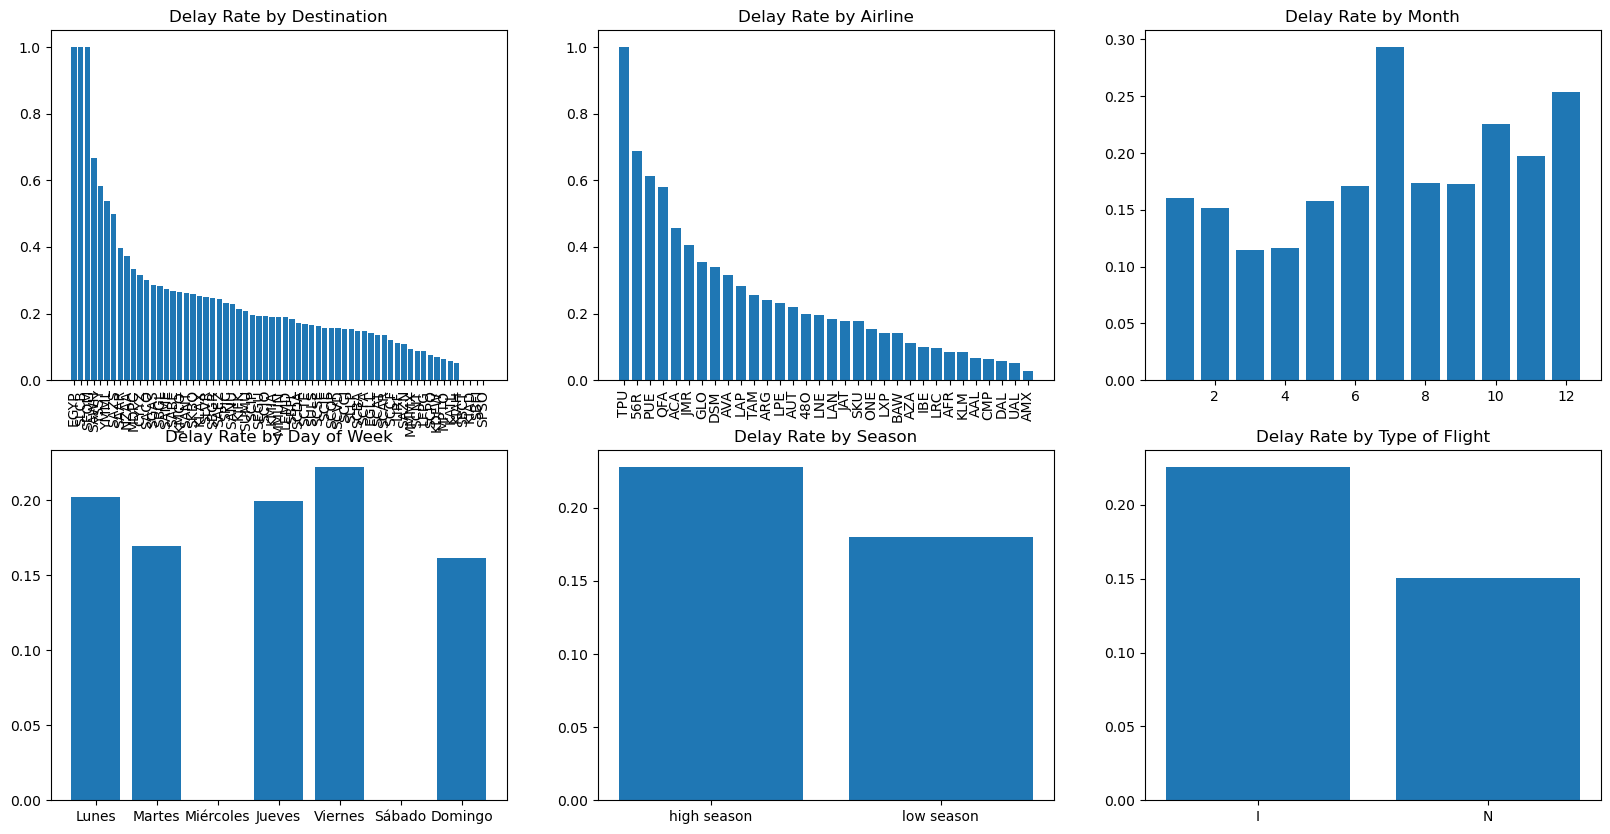

In [43]:
# Gráfico de los resultados de comporatmiento de las variables seleccionadas.
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes[0, 0].bar(destination_delay_rate.index, destination_delay_rate.values)
axes[0, 0].set_title('Delay Rate by Destination')
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 1].bar(airline_delay_rate.index, airline_delay_rate.values)
axes[0, 1].set_title('Delay Rate by Airline')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 2].bar(month_delay_rate.index, month_delay_rate.values)
axes[0, 2].set_title('Delay Rate by Month')
axes[1, 0].bar(day_of_week_delay_rate.index, day_of_week_delay_rate.values)
axes[1, 0].set_title('Delay Rate by Day of Week')
axes[1, 1].bar(season_delay_rate.index, season_delay_rate.values)
axes[1, 1].set_title('Delay Rate by Season')
axes[1, 2].bar(type_of_flight_delay_rate.index, type_of_flight_delay_rate.values)
axes[1, 2].set_title('Delay Rate by Type of Flight')
plt.show()

In [44]:
"""Al analizar los gráficos, es posible apreciar que las variables que más influyen en los atrasos y sus predicciones son
el destino y la aerolinea. Esto debido a que llegan a un ratio de atraso cercano o incluso 1 en ciertas ocaciones. 
Luego, le sigue el mes de viaje el cual llega casi al 0.3 de ratio de atraso. Las otras 3 variables poseen valores menores,
Ligeramente superiores a 0.2 de ratio."""

'Al analizar los gráficos, es posible apreciar que las variables que más influyen en los atrasos y sus predicciones son\nel destino y la aerolinea. Esto debido a que llegan a un ratio de atraso cercano o incluso 1 en ciertas ocaciones. \nLuego, le sigue el mes de viaje el cual llega casi al 0.3 de ratio de atraso. Las otras 3 variables poseen valores menores,\nLigeramente superiores a 0.2 de ratio.'

In [45]:
#PUNTO 4

In [169]:
df4 = df

In [170]:
# Se codifican las variables categoricas y se eliminan las que no serán utiles para el análisis
df4 = pd.get_dummies(df4, columns = ["Des-O"], drop_first=True) 
df4 = pd.get_dummies(df4, columns = ["DIANOM"], drop_first = True)
df4 = pd.get_dummies(df4, columns = ["TIPOVUELO"], drop_first = True)
df4 = pd.get_dummies(df4, columns = ["OPERA"], drop_first = True)
df4 = pd.get_dummies(df4, columns = ["period_day"], drop_first = True)
df4 = pd.get_dummies(df4, columns = ["season"], drop_first = True)
del df4['high_season']
del df4['DIA']
del df4['AÑO']
del df4['Des-I']
del df4['Emp-I']
del df4['Emp-O']
del df4['SIGLAORI']
del df4['SIGLADES']
del df4['Fecha-I']
del df4['Fecha-O']
del df4['Vlo-I']
del df4['Vlo-O']
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68203 entries, 0 to 68205
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MES                             68203 non-null  int64  
 1   min_diff                        68203 non-null  float64
 2   delay_15                        68203 non-null  int32  
 3   Des-O_EGLL                      68203 non-null  uint8  
 4   Des-O_EGYP                      68203 non-null  uint8  
 5   Des-O_KATL                      68203 non-null  uint8  
 6   Des-O_KDFW                      68203 non-null  uint8  
 7   Des-O_KIAD                      68203 non-null  uint8  
 8   Des-O_KIAH                      68203 non-null  uint8  
 9   Des-O_KJFK                      68203 non-null  uint8  
 10  Des-O_KLAX                      68203 non-null  uint8  
 11  Des-O_KMCO                      68203 non-null  uint8  
 12  Des-O_KMIA                      

In [171]:
# Ahora con las nuevas variables, checheamos la relevancia de estas con la desviación estandar y la correlación
df4.std()

MES                                3.523201
min_diff                          19.313597
delay_15                           0.388246
Des-O_EGLL                         0.054743
Des-O_EGYP                         0.003829
Des-O_KATL                         0.072260
Des-O_KDFW                         0.072160
Des-O_KIAD                         0.003829
Des-O_KIAH                         0.069809
Des-O_KJFK                         0.074630
Des-O_KLAX                         0.047465
Des-O_KMCO                         0.022322
Des-O_KMIA                         0.121140
Des-O_LEMD                         0.113738
Des-O_LFPG                         0.072361
Des-O_LIRF                         0.061507
Des-O_MDPC                         0.028127
Des-O_MMMX                         0.100717
Des-O_MMUN                         0.030379
Des-O_MPTO                         0.162449
Des-O_NZAA                         0.072561
Des-O_SAAR                         0.044611
Des-O_SABE                      

In [172]:
df4.corr()

,MES,min_diff,delay_15,Des-O_EGLL,Des-O_EGYP,Des-O_KATL,Des-O_KDFW,Des-O_KIAD,Des-O_KIAH,Des-O_KJFK,Des-O_KLAX,Des-O_KMCO,Des-O_KMIA,Des-O_LEMD,Des-O_LFPG,Des-O_LIRF,Des-O_MDPC,Des-O_MMMX,Des-O_MMUN,Des-O_MPTO,Des-O_NZAA,Des-O_SAAR,Des-O_SABE,Des-O_SACO,Des-O_SAEZ,Des-O_SAME,Des-O_SANT,Des-O_SANU,Des-O_SAWH,Des-O_SAZN,Des-O_SAZS,Des-O_SBCT,Des-O_SBFI,Des-O_SBFL,Des-O_SBGL,Des-O_SBGR,Des-O_SCAR,Des-O_SCAT,Des-O_SCBA,Des-O_SCCF,Des-O_SCCI,Des-O_SCDA,Des-O_SCFA,Des-O_SCIE,Des-O_SCIP,Des-O_SCJO,Des-O_SCNT,Des-O_SCPQ,Des-O_SCQP,Des-O_SCSE,Des-O_SCTE,Des-O_SCVD,Des-O_SEGU,Des-O_SEQM,Des-O_SGAS,Des-O_SKBO,Des-O_SLCB,Des-O_SLLP,Des-O_SLVR,Des-O_SPJC,Des-O_SPSO,Des-O_SULS,Des-O_SUMU,Des-O_YMML,Des-O_YSSY,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_N,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,OPERA_Delta Air,OPERA_Gol Trans,OPERA_Grupo LATAM,OPERA_Iberia,OPERA_JetSmart SPA,OPERA_K.L.M.,OPERA_Lacsa,OPERA_Latin American Wings,OPERA_Oceanair Linhas Aereas,OPERA_Plus Ultra Lineas Aereas,OPERA_Qantas Airways,OPERA_Sky Airline,OPERA_United Airlines,period_day_morning,period_day_night,season_low season
MES,1.000000,0.077303,0.083451,-0.000812,0.004757,-0.003224,-0.002212,0.001497,-0.003280,-0.006408,-0.002185,-0.011033,-0.008032,0.000922,-0.002277,-0.001645,0.000202,-0.004891,-0.005238,-0.009306,-0.001712,0.042567,0.003099,0.008451,-0.015876,0.013887,0.029334,0.028335,0.013428,0.029303,-0.002494,-0.003682,-0.000189,-0.011447,-0.001385,0.014672,-0.005880,0.007710,-0.003494,0.021995,0.006375,-0.016013,0.003723,0.021290,-0.001617,0.019601,-0.030979,-0.001304,-0.001231,0.002727,-0.009780,-0.010992,-0.008111,-0.000189,0.004325,-0.013896,0.005844,-0.001971,0.015318,-0.014959,0.003670,0.014316,-0.017545,0.030066,-0.002722,0.006871,-0.011851,-0.003721,0.000105,0.003759,0.010264,0.011488,-0.003060,-0.008214,-0.002360,-0.001645,-0.007725,0.015537,-0.026272,-0.000812,-0.009306,-0.003224,0.003812,-0.042318,-0.001917,0.139993,-0.000091,0.039084,0.037450,0.062673,0.016073,-0.002296,-0.005452,-0.003194,-0.000718,-0.013490,-0.135976
min_diff,0.077303,1.000000,0.724260,-0.004406,0.008107,-0.033836,-0.038279,-0.001806,-0.039857,0.011757,0.010332,0.004327,0.000405,0.002103,-0.028062,-0.012203,0.007261,-0.031487,-0.002748,-0.076916,0.034506,0.022939,0.030967,0.030034,0.027710,0.051786,0.006299,0.005904,0.007474,-0.001340,0.002633,-0.004044,-0.002134,-0.003555,0.038039,0.030454,-0.019601,-0.016580,-0.000694,-0.046471,-0.000109,-0.006056,-0.032886,-0.010088,0.010601,0.004263,-0.008096,-0.008823,-0.009782,-0.009571,-0.002946,-0.006170,0.003885,0.012026,0.011674,0.025141,0.020597,-0.001059,0.010773,0.039361,-0.001410,-0.000297,0.008416,0.012566,0.049329,0.008952,0.018772,-0.016531,-0.012029,-0.015389,0.038872,-0.072724,-0.043222,0.065301,-0.029003,-0.012203,-0.048454,-0.004270,0.013718,-0.004406,-0.076916,-0.033836,0.015861,0.022775,-0.018285,-0.011036,-0.024545,-0.008050,0.127007,-0.009192,0.031381,0.049144,-0.026493,-0.039896,-0.041772,0.017608,-0.041409
delay_15,0.083451,0.724260,1.000000,-0.006148,0.008039,-0.023626,-0.021469,-0.001824,-0.024219,0.005746,0.008371,0.004589,0.001904,0.001551,-0.018471,-0.011603,0.010760,-0.024098,0.000434,-0.052569,0.035516,0.024423,0.046243,0.036915,0.034372,0.035283,0.004757,0.002547,0.011638,-0.004610,0.004395,-0.003159,-0.002579,0.000032,0.036740,0.037474,-0.024521,-0.020651,-0.011018,-0.046137,-0.014256,-0.008775,-0.030228,-0.018569,0.002518,0.001291,-0.008449,-0.016408,-0.014978,-0.011391,-0.011081,-0.008043,0.001906,0.011369,0.014980,0.029498,0.008039,-0.004544,0.007036,0.033888,-0.001824,-0.000441,0.006960,0.021781,0.054688,0.015792,0.018459,-0.016551,-0.014790,-0.020917,0.040267,-0.096282,-0.028982,0.063962,-0.018922,-0.011603,-0.032080,0.001508,0.027243,-0.006148,-0.052569,-0.023626,0.048207,-0.019802,-0.016084,-0.001954,-0.015853,-0.006188,0.090724,-0.005086,

In [173]:
# Al comparar las desviaciones estandar y las correlaciones con la variable objetivo (delay_15) 
# vemos que hay ciertas variables que no aportan, por lo tanto son eliminadas para evitar dependencias lineares
del df4['Des-O_SBFI']
del df4['Des-O_MMUN']
del df4['Des-O_SULS']
del df4['Des-O_EGYP']
del df4['Des-O_KIAD']
del df4['Des-O_SBCT']
del df4['Des-O_SLCB']
del df4['Des-O_SPSO']
del df4['Des-O_SAWH']

In [174]:
y = df4['delay_15'] #toma el valor de 1 cuando la variable es si y 0 cuando la variable es no
del df4['delay_15']
X = df4

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Escalar los valores numericos
scaler = StandardScaler()
num_cols = ['MES', 'min_diff']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [177]:
# Se entrena con un modelo logistico
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [178]:
# Se evalúa la performance en el modelo con el set de prueba.
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11130     0]
 [    0  2511]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11130
           1       1.00      1.00      1.00      2511

    accuracy                           1.00     13641
   macro avg       1.00      1.00      1.00     13641
weighted avg       1.00      1.00      1.00     13641



In [179]:
# Al tener 1.00 de precisión es probable que exista un problema de overfitting.Por lo que se realiza una validación cruzada.

In [180]:
# Se entrena el modelo con regresión logistica con validación cruzada
model = LogisticRegression(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [1.         1.         0.99972507 0.99972507 0.99972507]
Mean cross-validation score: 0.99983504398827


In [181]:
# Adaptar el modelo con la data de entrenamiento.
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [182]:
# Evaluar la performance del modelo con el set de prueba
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11130     0]
 [    0  2511]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11130
           1       1.00      1.00      1.00      2511

    accuracy                           1.00     13641
   macro avg       1.00      1.00      1.00     13641
weighted avg       1.00      1.00      1.00     13641



In [ ]:
#Aplicamos un árbol de decisión.

In [146]:
arbol = DecisionTreeClassifier(criterion = 'entropy') 

In [147]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

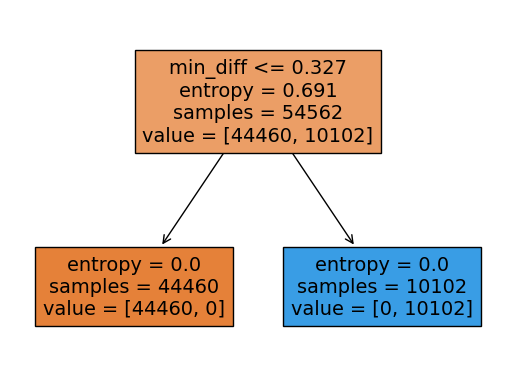

In [149]:
tree.plot_tree(arbol, feature_names = df4.columns, filled = True)
plt.show()

In [150]:
arbol = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3, max_leaf_nodes= 18, min_samples_split= 2)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=18)

In [151]:
parametros= {'max_leaf_nodes': [5,18,30], 'min_samples_split': [2, 3, 4], 'max_depth':[2,3,4]}

In [152]:
tree_cv=GridSearchCV(arbol,parametros,cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              max_leaf_nodes=18),
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [5, 18, 30],
                         'min_samples_split': [2, 3, 4]})

In [153]:
print('Best params:')
print(tree_cv.best_params_)

Best params:
{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 2}


In [154]:
arbol = tree_cv.best_estimator_

In [129]:
scaler = MinMaxScaler()
scaler_data = scaler.fit(df4)
df4_scaled = pd.DataFrame(scaler_data.transform(df4), index=df4.index, columns=df4.columns)

In [130]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df4_scaled, y, test_size=0.3, random_state = 0)

In [131]:
#K-vecinos mas cercanos

In [132]:
Knn = KNeighborsClassifier()

In [133]:
parametros= {'n_neighbors': [3,5,11,19,23,27], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}

In [134]:
knn_cv=GridSearchCV(Knn,parametros,cv=10)
knn_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19, 23, 27],
                         'weights': ['uniform', 'distance']})

In [135]:
print('Best params for k-neighborns:')
print(knn_cv.best_params_)

Best params for k-neighborns:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [136]:
Knn = knn_cv.best_estimator_

In [137]:
grid_results = pd.DataFrame(knn_cv.cv_results_)

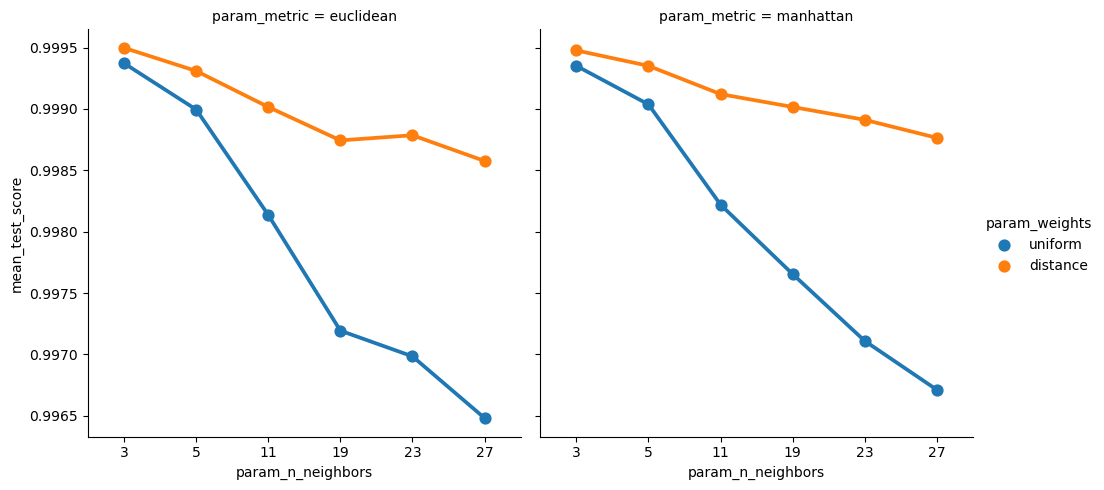

In [138]:
sn.catplot(x="param_n_neighbors", y="mean_test_score", hue="param_weights", kind="point", col="param_metric",data=grid_results);

In [139]:
#Ahora con Random Forest

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

Best params for Random Forest:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


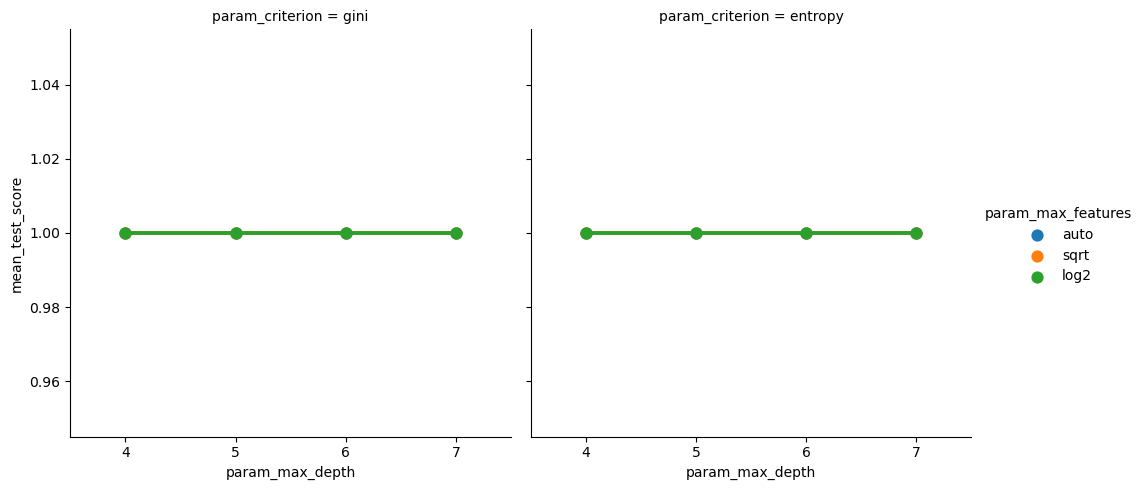

In [140]:
rf = RandomForestClassifier(n_estimators=200)

#Determinamos los parametros a probar en la grilla
parametros={  'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7],'criterion' :['gini', 'entropy']}

#Realizamos la grilla
rf_cv=GridSearchCV(rf,parametros,cv=10)
rf_cv.fit(X_train_scaled, y_train_scaled)

#vemos los mejores parametros segun la grilla
print('Best params for Random Forest:')
print(rf_cv.best_params_)

#Guardamos el mejor modelo para luego obtener sus reusltados de validacion
rf = rf_cv.best_estimator_

#transformamos los resultados de la grilla en un dataframe
grid_results = pd.DataFrame(rf_cv.cv_results_)

#graficamos los puntaje obtenidos segun cada parametro analizado
sn.catplot(x="param_max_depth", y="mean_test_score", hue="param_max_features", kind="point", col="param_criterion",data=grid_results);

In [141]:
#Support Vector Machine

Best params for SVM:
{'C': 1000.0, 'gamma': 0.0001}


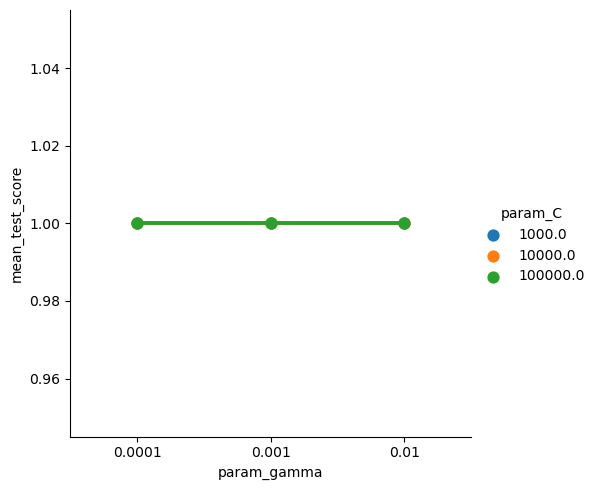

In [142]:
svm = SVC(probability=True)

#Aplicamos grid search para los parametros
parametros={'C': [1e3, 1e4, 1e5],'gamma': [0.0001, 0.001, 0.01]}
svm_cv=GridSearchCV(svm,parametros,cv=10)
svm_cv.fit(X_train_scaled, y_train_scaled)

#para ver los parametros del mejor modelo
print('Best params for SVM:')
print(svm_cv.best_params_)

#Guardamos el mejor modelo para luego obtener sus reusltados de validacion
svm = svm_cv.best_estimator_

#transformamos los reusltados de la grilla en un dataframe
grid_results = pd.DataFrame(svm_cv.cv_results_)

#graficamos los puntaje obtenidos segun cada parametro analizado
sn.catplot(x="param_gamma", y="mean_test_score", hue="param_C", kind="point",data=grid_results);

In [143]:
# PUNTO 5

In [144]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [159]:
# Accuracy Arbol
Ac_tree = arbol.score(X_test, y_test) #con el modelo entrenado en entrenamiento (arbol)
print('Accuracy of Decision trees: {:.2f}'.format(Ac_tree))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_tree = arbol.predict(X_test)

#matriz de confusion
metrics.plot_confusion_matrix(arbol, X_test, y_test, values_format='.6g', cmap='Blues') 
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test, Y_pred_tree)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test, arbol.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, Y_pred_tree)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Arbol de decisión','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)

Accuracy of Decision trees: 1.00


AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [ ]:
# Accuracy K-vecinos mmas cercanos
Ac_knn = Knn.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of k-vecinos mas cercanos: {:.2f}'.format(Ac_knn))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_knn = Knn.predict(X_test_scaled)

#matriz de confusion
metrics.plot_confusion_matrix(Knn, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues') 
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_knn)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, Knn.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_knn)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'K-vecinos mas cercanos','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)

In [ ]:
# Accuracy Random Forest
Ac_rf = rf.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of random forest: {:.2f}'.format(Ac_rf))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_rf = rf.predict(X_test_scaled)

#matriz de confusion
metrics.plot_confusion_matrix(rf, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues') 
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_rf)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, rf.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_rf)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Random forest','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)

In [ ]:
# Accuracy Support Vector Machine
Ac_svm = svm.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of red neuronal: {:.2f}'.format(Ac_svm))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_svm = svm.predict(X_test_scaled)

#matriz de confusion
metrics.plot_confusion_matrix(svm, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues') 
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_svm)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, svm.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_svm)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Suport vector machine','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)

In [168]:
"""Como resultado final, se obtuvo que según los modelos usados, la probabilidad de que un vuelo se retrase es del 100%. Sin embargo, este resultado es erroneo dado que hay un problema de overfitting que no pude solucionar. La mejor forma de entrenar el modelo es con los K-vecinos más cercanos, ya que es la que más se aleja del problema del overfitting. Esto debido a que es el unico que no da 1 si no que un poco menor. Las variables que más influyen son el destino y la aerolinea. Se podría mejorar el modelo al solucionar el problema de overfitting."""

'Como resultado final, se obtuvo que según los modelos usados, la probabilidad de que un vuelo se retrase es del 100%. Sin embargo, este resultado es erroneo dado que hay un problema de overfitting que no pude solucionar. La mejor forma de entrenar el modelo es con los K-vecinos más cercanos, ya que es la que más se aleja del problema del overfitting. Esto debido a que es el unico que no da 1 si no que un poco menor. Las variables que más influyen son el destino y la aerolinea. Se podría mejorar el modelo al solucionar el problema de overfitting.'